# DT2470 Lab 02: Synchronization and rhythm

by Andre Holzapfel

In this lab you will choose to **either** do exercises regarding synchronization (chapter 3), **or** rhythm and tempo processing (chapter 6). We agree that doing both would be too much work (for this year), but you will have the code for the solutions for both anyway!

Again, you can use whatever software you want for your own implementation, but I use python in my explanations, and two external libraries in python need to be used in this Lab. Just as Bob, I am basically learning Python by working on this lab, so excuse my bad programming. (I am a bad programmer independent of language, anyway.)

Your task is to reproduce all shown figures with your code (or show the equivalent plots for your own audio files, if you use different ones). Also, provide short answers to the questions in the text.

## Audio samples:

In my examples I use file from the following google folder:

https://drive.google.com/drive/folders/1TGj4ZcEgdGXt9Eko2qViiiKWkUDDewbL?usp=sharing

You can copy these files to your own google folder and use them as explained in Lab 1.

At some points I will ask you to use some audio examples of your own. Be creative...the goal is to check where systems work or fail, and understand (to some extent) those behaviors.

## Code preparations

As for Lab 1, you need to have some external libraries also here:

In [0]:
# Install a python library for working with audio files, named pydub

!pip install pydub



In [1]:
#other preparations!
import os, sys
from scipy import signal
import pydub
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


### Google drive:

you need to adapt the following code to use the audio files that you copied to your google drive.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

# 1. Synchronisation

Complete the tasks in this part, if you want to focus on the synchronisation (but have a look at the rhythm part below before you decide!).

## Part 1.1 Warming up

Choose two music sound files that can be considered as interpretations of the same "tune". In my example I used the cmajor_piano.wav and Cmajor_sung.wav, where a C-major scale is performed, once on piano and once sung. For the beginning, choose some excerpts, and not complete pieces, in order to get started.

Read the sound files to a numpy array, and plot the two waveforms. (You did that in Lab 1 too).

Below the waveform I get for the piano file: ![waveform](https://drive.google.com/uc?id=1nt5lUZ1IWO8nWDx2mTdddz2pI9CuBfTq)


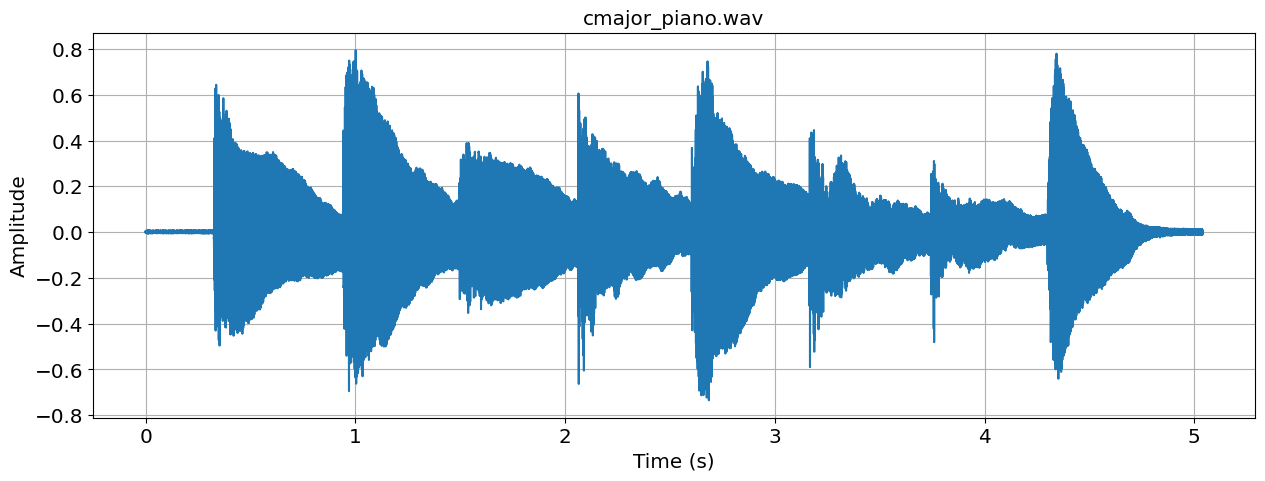

In [2]:
from pydub import AudioSegment
from scipy.io import wavfile
import array

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# add your code below
audio = AudioSegment.from_file("cmajor_piano.wav", format="wav")

samplerate = audio.frame_rate

channels = audio.split_to_mono()
samples = channels[0].get_array_of_samples() #the left channel
samples_array = array.array(audio.array_type, samples)
samples_array = [(i/2**16)*2 for i in samples_array]

time = np.arange(len(samples_array))/float(samplerate)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('cmajor_piano.wav')
plt.grid(True)
plt.plot(time,samples_array)

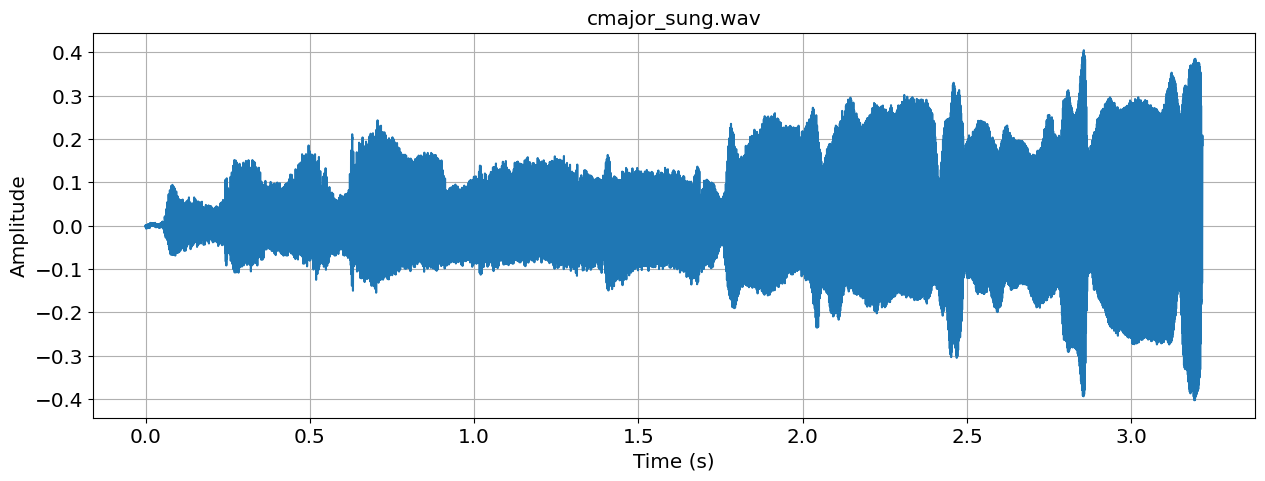

In [3]:
audio2 = AudioSegment.from_file("cmajor_sung.wav", format="wav")

samplerate2 = audio2.frame_rate

channels2 = audio2.split_to_mono()
samples2 = channels2[0].get_array_of_samples() #the left channel
samples_array2 = array.array(audio2.array_type, samples2)
samples_array2 = [(i/2**16)*2 for i in samples_array2]

time2 = np.arange(len(samples_array2))/float(samplerate2)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('cmajor_sung.wav')
plt.grid(True)
plt.plot(time2,samples_array2)

## Part 1.2 Compute the spectral magnitude

For both signals compute a Short-time Fourier transform (STFT), and plot their magnitude spectra (as in equation 3.1. Use the code from Lab 1 as starting point). Note: Since you are focusing on tonal content in the Chroma features, use a long window (about 100ms).

The magnitude spectrum for the piano example is shown below. 

Question: why do we see so few high-frequency components? (Hint: in lab 1 you plotted db magnitude spectra).

![](https://drive.google.com/uc?id=1_fEgRgIG0pPzCiNa6Pqz5lDfk-vfGloX)

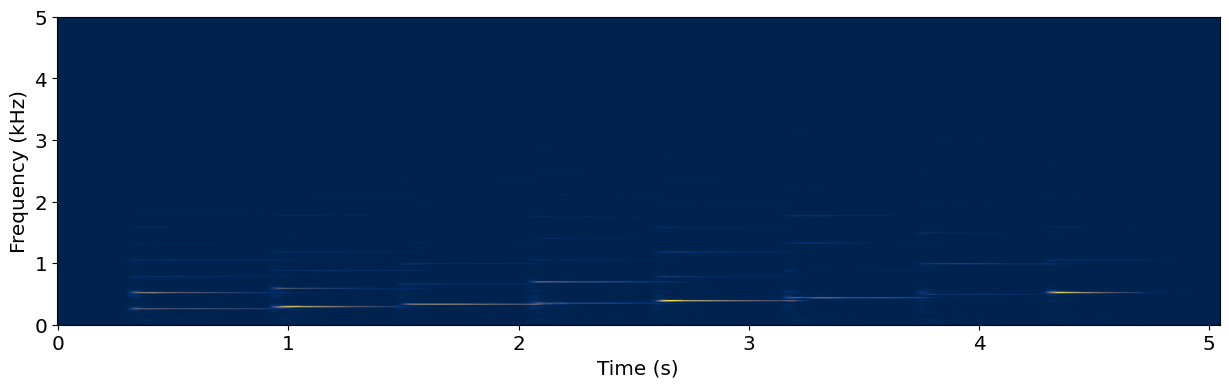

In [4]:
from scipy.signal import stft

window100 = samplerate * 0.001 * 100
hop10 = samplerate * 0.001 * 10 
frequencies, times, piano_stft = stft(samples_array, fs=samplerate, nperseg=window100, noverlap=window100-hop10)
piano_magnitude = np.abs(piano_stft)

plt.figure(figsize=(15, 4))
plt.pcolormesh(times, frequencies/1000, piano_magnitude, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.ylim(0, 5)
plt.show()


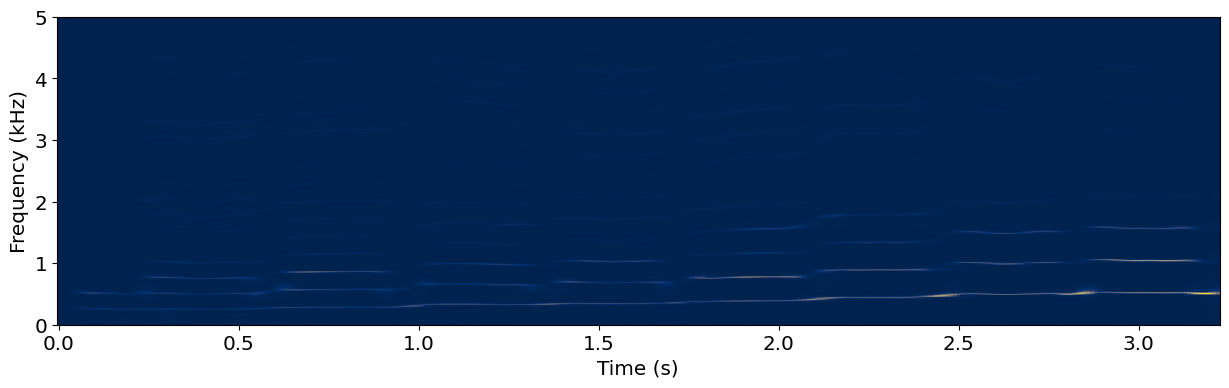

In [5]:

window100_sung = int(0.001*100*samplerate2) 
hop10_sung = int(0.001*10*samplerate2)
frequencies_sung, times_sung, sung_stft = stft(samples_array2, fs=samplerate2, nperseg=window100_sung, noverlap=window100_sung-hop10_sung)
sung_magnitude = np.abs(sung_stft)

plt.figure(figsize=(15, 4))
plt.pcolormesh(times_sung, frequencies_sung/1000, sung_magnitude, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (kHz)')
plt.ylim(0, 5)
plt.show()

We can only see few high frequency component because the difference between high and low frequency is very large. The distribution of high frequency component on the image is sparse so it's hard to see it. Also, for the two audios of piano and human sung, they are both have more energy in the low frequency domain, which make the high frequency component fewer in the plots.

## Part 1.3 Compute a log-frequency spectrogram

Now, transform the linear frequency axis into a logarithmic one (equation 3.4), and plot the resulting log-frequency spectra for both signals.

Hint: you need to assign the frequencies of the STFT coefficients to the desired pitch bins of the 12-tone resolution (equations 3.2 and 3.3, and the related text in the book help). Unless you are a good numpy programmer (I am not), you will need some loop in that code...

My piano log-f spectrogram looks as shown below.

Question: why do the low-frequency regions look so spread-out and smeary?

![](https://drive.google.com/uc?id=1pxHK7CVEX438DB4BAASGEiU3Qi-hw3Sc)



C:\Users\SiyiQian\AppData\Local\Temp\ipykernel_12972\2682115933.py:2: RuntimeWarning: divide by zero encountered in log2
  pitch = 12*(np.log2(freq)-np.log2(440))+69


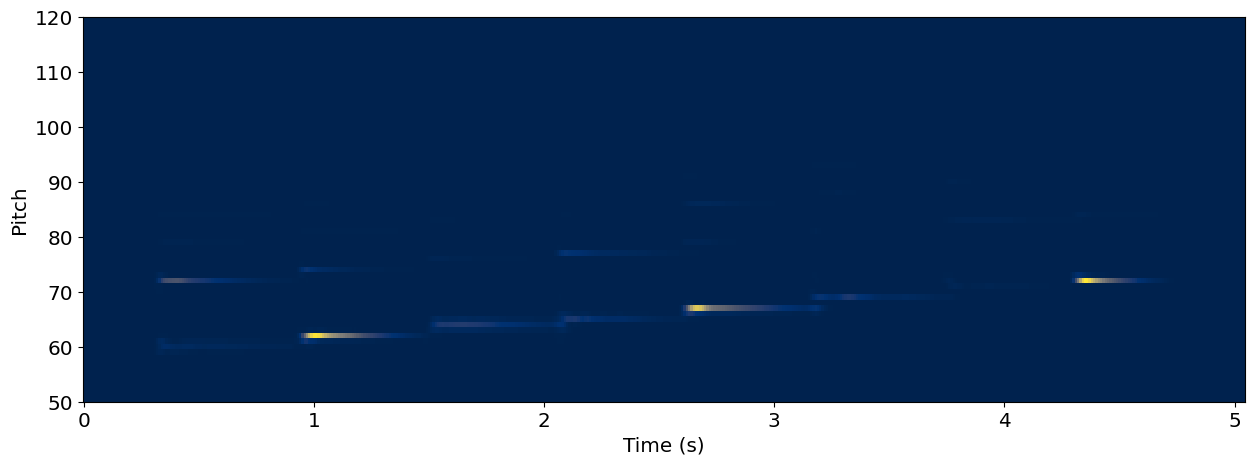

In [6]:
def pitchspectro(freq, seg):
    pitch = 12*(np.log2(freq)-np.log2(440))+69
    pitch = np.round(pitch,0).astype(int)
    ylf = np.zeros((128, np.size(seg,1)))
    for p in range(0,128):
        for n in range(np.size(seg,1)):
            for i in range(len(freq)):
                if (pitch[i]==p):
                    ylf[p,n]+=np.power(np.abs(seg[i,n]),2)
                    
    return ylf

bins = range(0,128)
ylf_piano = pitchspectro(frequencies, piano_stft)
plt.pcolormesh(times, bins, ylf_piano, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.ylim(50,120)
plt.show()

C:\Users\SiyiQian\AppData\Local\Temp\ipykernel_12972\2682115933.py:2: RuntimeWarning: divide by zero encountered in log2
  pitch = 12*(np.log2(freq)-np.log2(440))+69


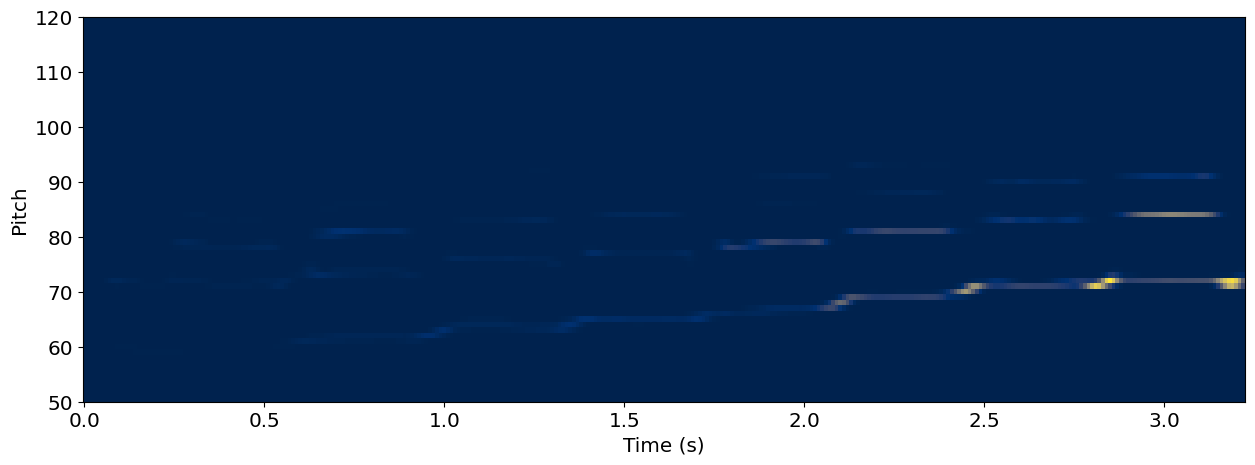

In [7]:
ylf_sung = pitchspectro(frequencies_sung, sung_stft)
plt.pcolormesh(times_sung, bins, ylf_sung, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.ylim(50,120)
plt.show()

## Compute the chromagram

The chromagram is a feature that captures well harmonic and melodic development in a sound file. You will compute these features, to apply a synchronization (DTW) algorithm to them.



1.   Compute the chromagram according to equation 3.6

![](https://drive.google.com/uc?id=1Hj26wZ2WHufe1DkZqZoFrJ06kS7y8msS)

2.   Apply logarithmic compression to the chromagram. This will be your input feature for the DTW (my example uses gamma=100).

![](https://drive.google.com/uc?id=1eX8WhSmn6XxI8sIXxfRxdnssSrf2kICT)







In [8]:
def chromagram(ylf):
    chroma = np.zeros((12,np.size(ylf,1)))
    for p in range(128):
        c = p%12
        for n in range(np.size(ylf,1)):
            chroma[c,n]+=ylf[p,n]
    
    return chroma

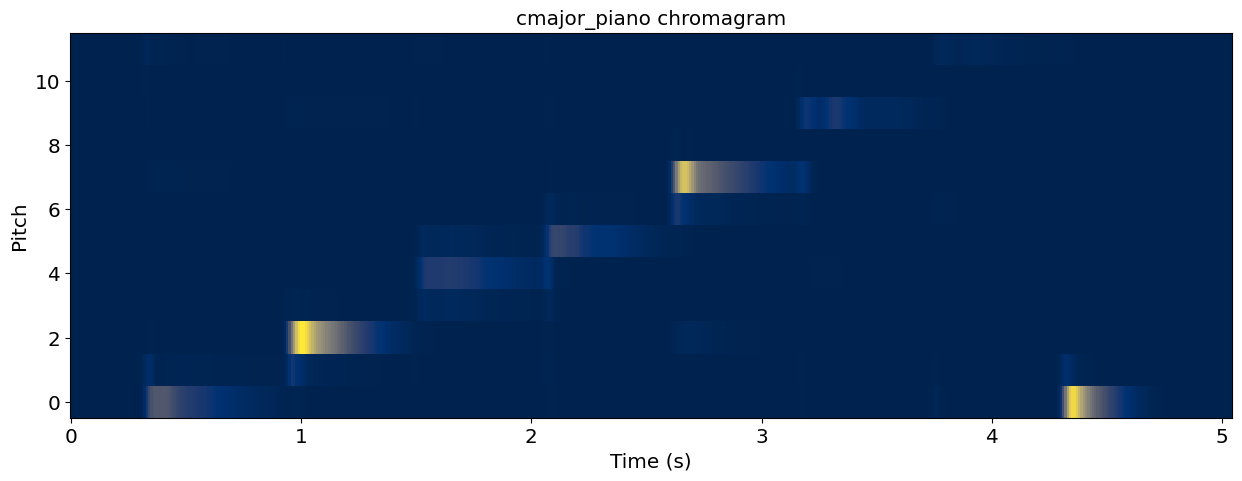

In [9]:
chromas = range(0,12)
chroma_piano = chromagram(ylf_piano)
plt.pcolormesh(times, chromas, chroma_piano, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('cmajor_piano chromagram')
plt.show()

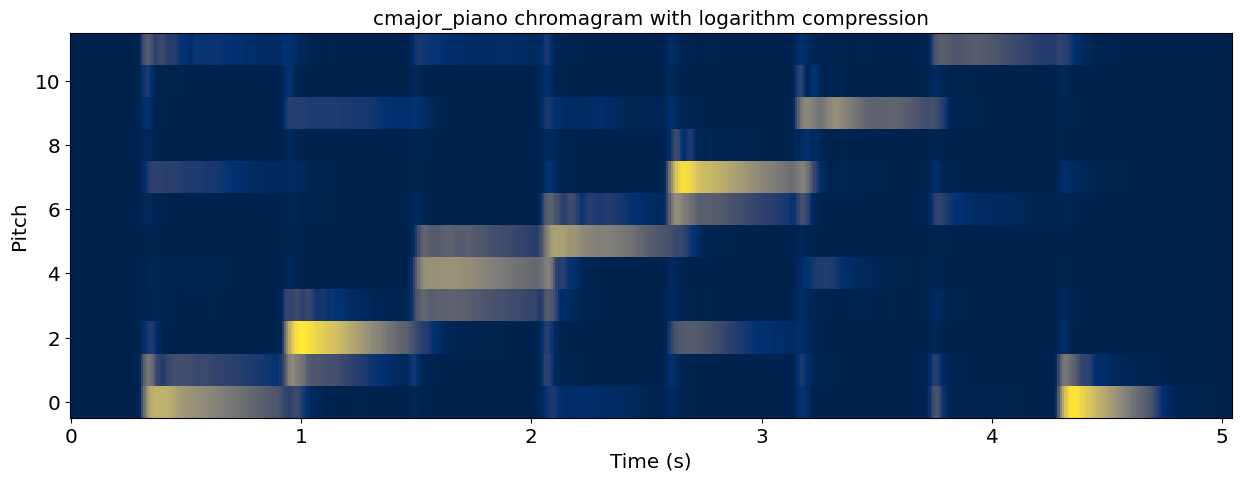

In [10]:
gamma = 1000
chroma_piano_log = np.log(1+gamma*chroma_piano)
plt.pcolormesh(times, chromas, chroma_piano_log, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('cmajor_piano chromagram with logarithm compression')
plt.show()

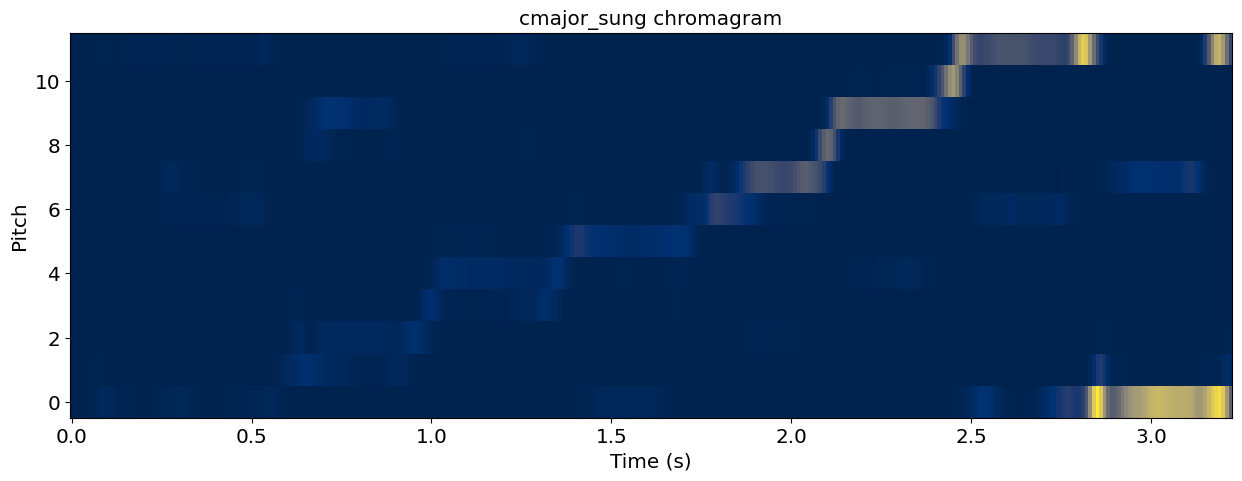

In [11]:
chroma_sung = chromagram(ylf_sung)
plt.pcolormesh(times_sung, chromas, chroma_sung, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('cmajor_sung chromagram')
plt.show()

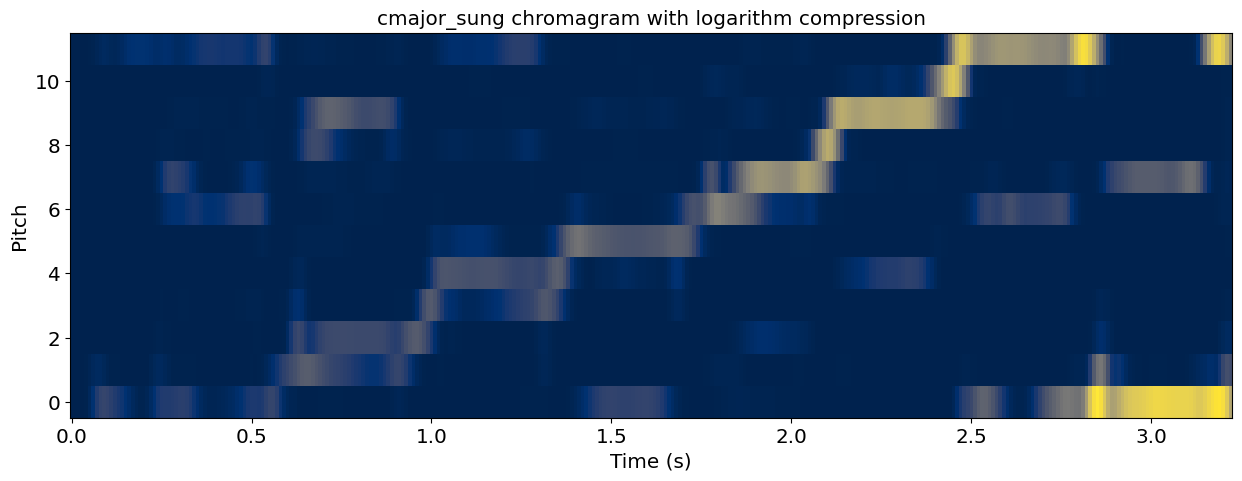

In [12]:
gamma = 1000
chroma_sung_log = np.log(1+gamma*chroma_sung)
plt.pcolormesh(times_sung, chromas, chroma_sung_log, cmap='cividis')
plt.xlabel('Time (s)')
plt.ylabel('Pitch')
plt.title('cmajor_sung chromagram with logarithm compression')
plt.show()

## Part 1.4 Compute the synchronization

To this end, you will use the DTW as provided by the librosa library. You can see how to use it in the following code:

https://librosa.github.io/librosa_gallery/auto_examples/plot_music_sync

You can use your two computed chromagrams as inputs X and Y to this function, as they are. Compute the synchronization, and plot the path over the obtained cost matrix D. Your code should start somehow like:

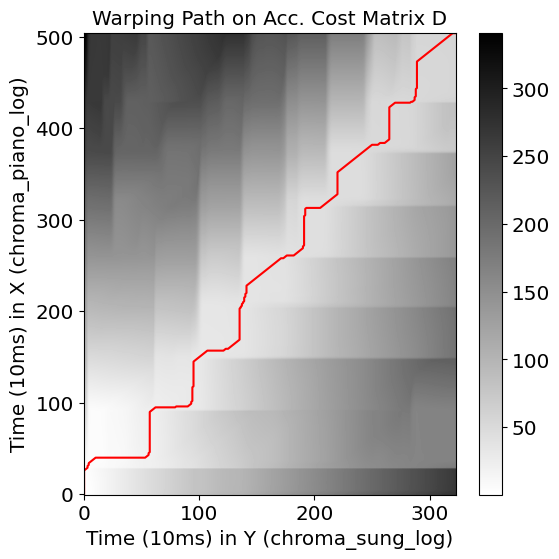

In [13]:
import librosa
import librosa.display
D, wp = librosa.sequence.dtw(X=chroma_piano_log, Y=chroma_sung_log, metric='cosine')
'''
fig=plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',cmap='gray_r',hop_length=hop10)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp[:, 1], wp[:, 0],  color='r')
plt.colorbar();

'''
plt.figure(figsize=(6, 6))
plt.imshow(D, origin='lower', cmap='gray_r', aspect='auto')
plt.plot(wp[:, 1], wp[:, 0], color='r')
plt.title('Warping Path on Acc. Cost Matrix D')
plt.xlabel('Time (10ms) in Y (chroma_sung_log)')
plt.ylabel('Time (10ms) in X (chroma_piano_log)')
plt.colorbar()

plt.show()

The plot I obtain when synchronizing the piano and the voice example:

![](https://drive.google.com/uc?id=1RRtacUyBpbXQ8QMEgitRdSuLaH61MAGr)

## Part 1.5 Compute the same alignment using the chroma features from librosa

OK, we went by the course book when computing the features above. Now let us use the librosa library, to compare with our implementation.

To this end, you can copy/paste and edit the code from the librosa example provided above, and compute the plots!

The chroma features look less noisy for me, probably because I used the logarithmic compression with a bad parameter. Note that the book says that all the parameters need to be adapted with care (which some people might call feature engineering):

![](https://drive.google.com/uc?id=1lxDS13V7f_azktMmJP5e9NUvQrp2KQ0c)

After that the warping path looks as follows for me:

![](https://drive.google.com/uc?id=1K5F9XnD6iyDudo1R9V4oCgmCYTqTzju8)

Finally, also compute the alignment visualization between the waveforms, as done in the librosa example. Mine looks as follows:

![](https://drive.google.com/uc?id=1feMM7D7w4uK3UajklQm849X3mDPtdkRU)



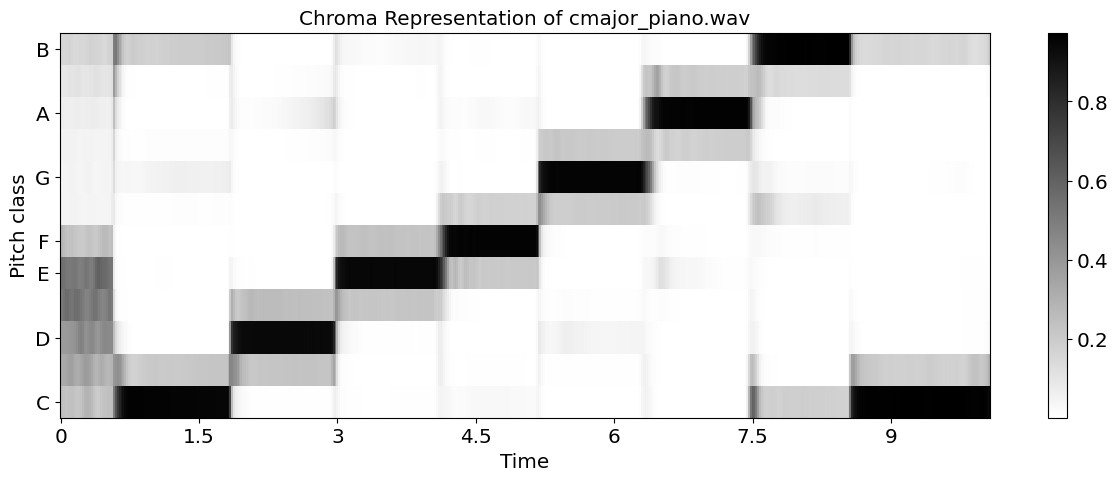

In [14]:
import librosa
window_size = int(44100*0.1)
hop_size = int(hop10)
x_piano, fs_piano= librosa.load('cmajor_piano.wav',sr=None)
x_piano_chroma = librosa.feature.chroma_stft(y=x_piano, sr=fs_piano, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=window_size)
plt.title('Chroma Representation of cmajor_piano.wav')
librosa.display.specshow(x_piano_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()

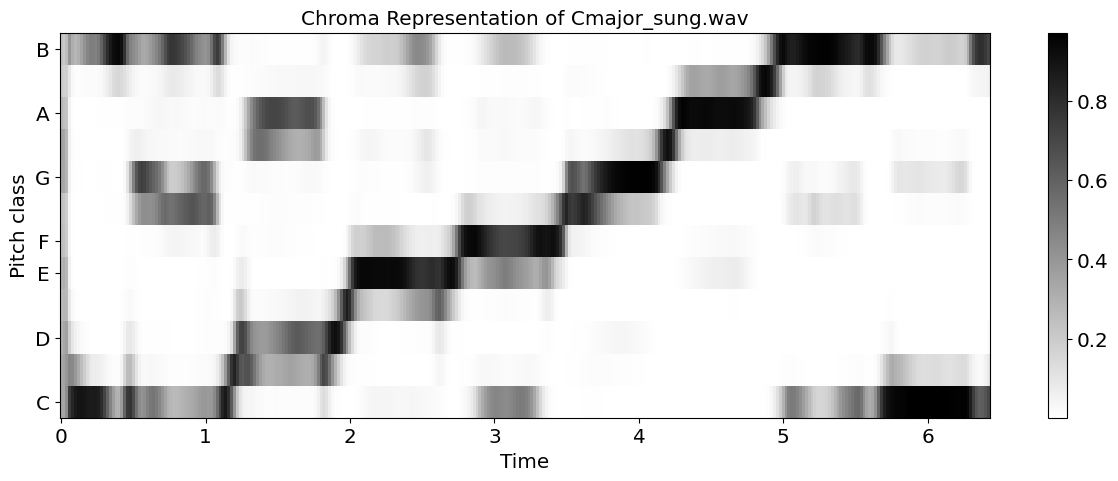

In [15]:
x_sung, fs_sung = librosa.load('Cmajor_sung.wav',sr=None)
x_sung_chroma = librosa.feature.chroma_stft(y=x_sung, sr=fs_sung, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=window_size)
plt.title('Chroma Representation of Cmajor_sung.wav')
librosa.display.specshow(x_sung_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()

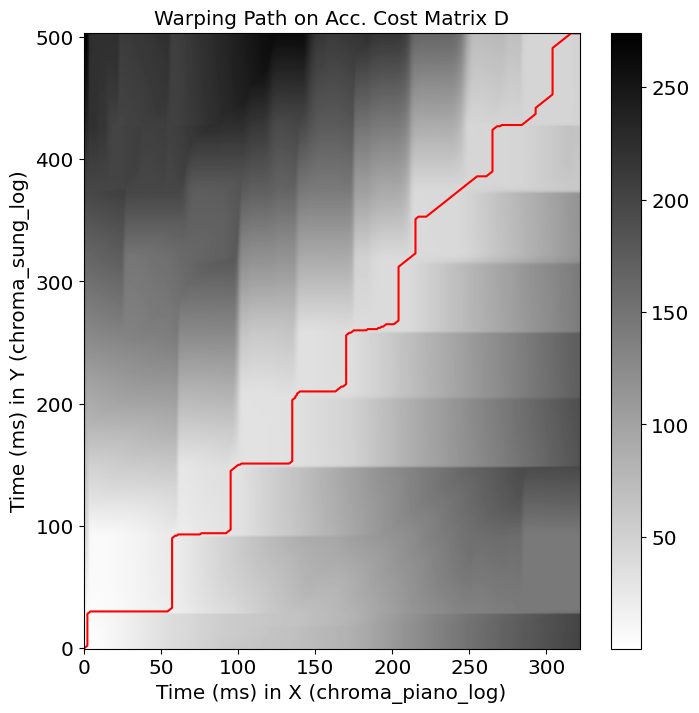

In [16]:
import librosa
import librosa.display
D, wp = librosa.sequence.dtw(X=x_piano_chroma, Y=x_sung_chroma, metric='cosine')

plt.subplots(figsize=(8, 8))
plt.imshow(D, origin='lower', cmap='gray_r', aspect='auto')
plt.plot(wp[:, 1], wp[:, 0], color='r')
plt.title('Warping Path on Acc. Cost Matrix D')
plt.ylabel('Time (ms) in Y (chroma_sung_log)')
plt.xlabel('Time (ms) in X (chroma_piano_log)')
plt.colorbar()

plt.show()

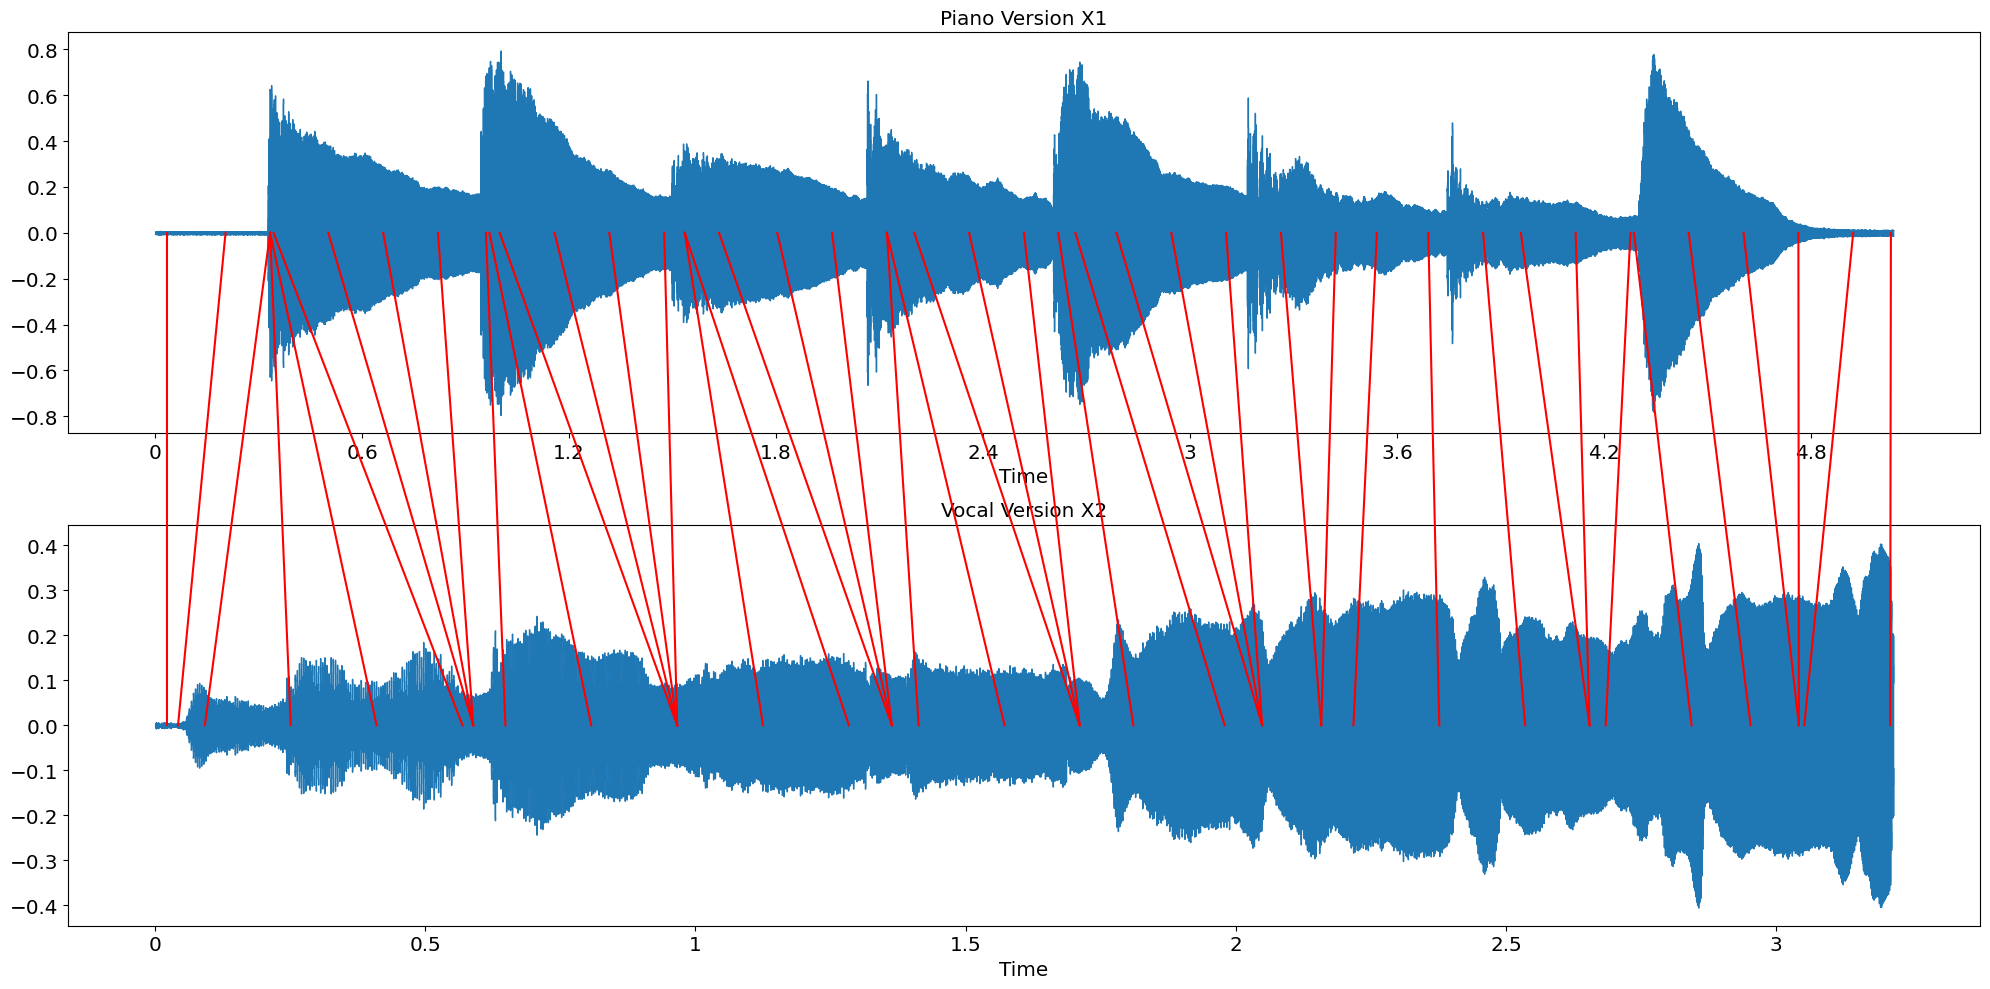

In [18]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(x_piano, sr=fs_piano)
plt.title('Piano Version X1')
ax1 = plt.gca()
plt.subplot(2, 1, 2)
librosa.display.waveshow(x_sung, sr=fs_piano)
plt.title('Vocal Version X2')
ax2 = plt.gca()
plt.tight_layout()


n_line = 44
idx = np.int16(np.linspace(0, wp.shape[0] - 1, n_line))
line = []
for tp1, tp2 in wp[idx] * hop_size / 44100:
    p1 = fig.transFigure.inverted().transform(ax1.transData.transform([tp1, 0]))
    p2 = fig.transFigure.inverted().transform(ax2.transData.transform([tp2, 0]))
    line_temp = matplotlib.lines.Line2D((p1[0], p2[0]),(p1[1], p2[1]), transform=fig.transFigure, color='r')
    line.append(line_temp)

fig.lines = line
plt.tight_layout()

## Part 1.6 Last task: conclude, explore



1.   Compare the alignment obtained from "your" features with those using the librosa features, are they different? If yes, why do you think?
2.   Replace the two simple sound files by two complete songs. You can use the Kafene1 and Kafene2 files in the shared folder, or some other song you like more. Compute the alignment, using the librosa features and provide a plot of the alignment curve. Did it work?
3. Find two files where the alignment does not work, and explain why. Note: this can be e.g. because the two versions differ in form (e.g. Refrain repeated in one version), tuning, or instrumentation. Also: the chroma features work best for harmonic instruments, and for western-tonal music.



1. The alignment obtained from our features look similar to the alignment obtained using the librosa features, but there are subtle differences. The differences may be caused by the different parameters chosen when extracting features, for example, the window size and the hop size. The differences can also be caused by the differnt gamma chosen to complete logarithm compression.

2.   Replace the two simple sound files by two complete songs. You can use the Kafene1 and Kafene2 files in the shared folder, or some other song you like more. Compute the alignment, using the librosa features and provide a plot of the alignment curve. Did it work?

It works as shown in the following codes and plots.

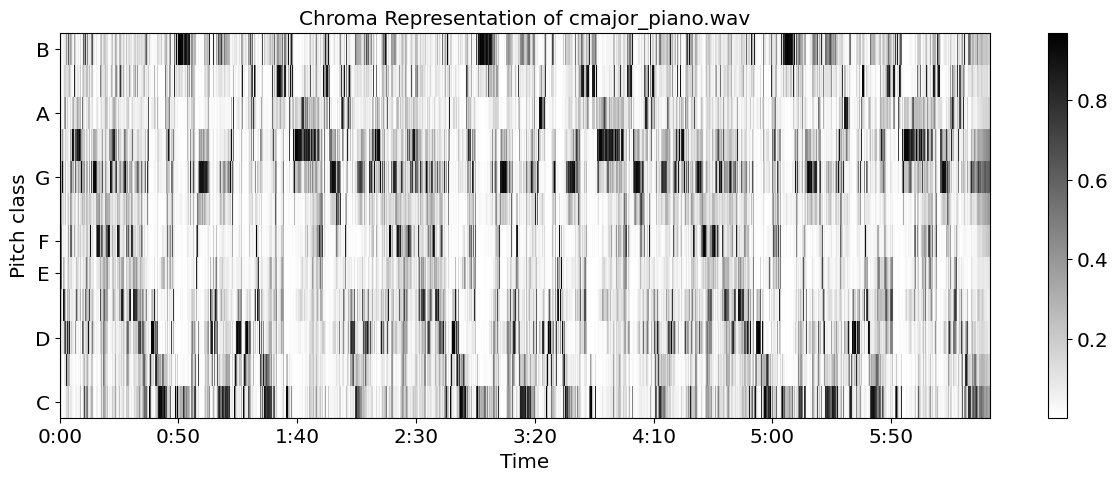

In [26]:
import librosa

x_kf1, fs_kf1= librosa.load('Kafene1.wav',sr=None)
window_kf1 = int(fs_kf1 * 0.001 * 100)
hop_kf1 = int(fs_kf1 * 0.001 * 10)
x_kf1_chroma = librosa.feature.chroma_stft(y=x_kf1, sr=fs_kf1, tuning=0, norm=2,
                                         hop_length=hop_kf1, n_fft=window_kf1)
plt.title('Chroma Representation of Kafene1.wav')
librosa.display.specshow(x_kf1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_kf1)
plt.colorbar()

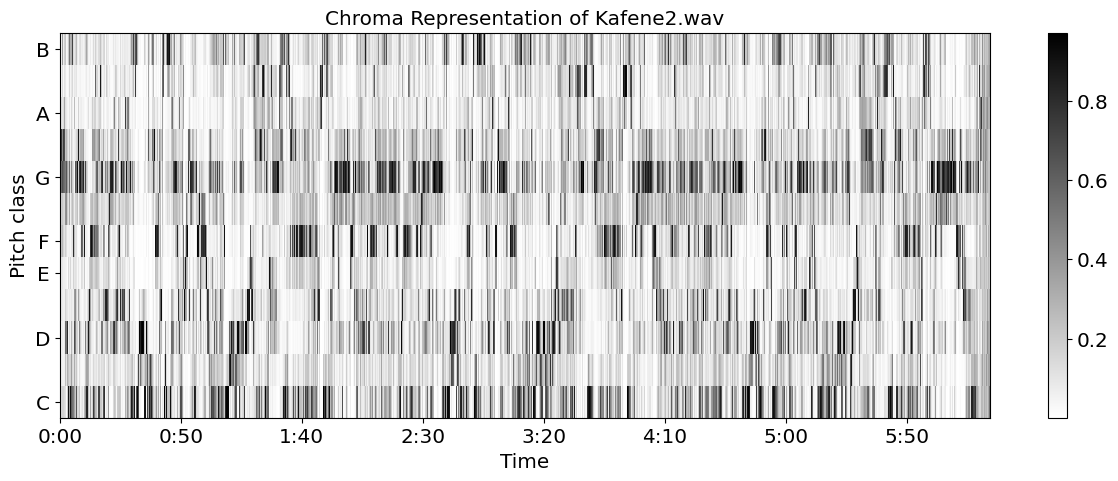

In [27]:
x_kf2, fs_kf2= librosa.load('Kafene2.wav',sr=None)
window_kf2 = int(fs_kf2 * 0.001 * 100)
hop_kf2 = int(fs_kf2 * 0.001 * 10)
x_kf2_chroma = librosa.feature.chroma_stft(y=x_kf2, sr=fs_kf2, tuning=0, norm=2,
                                         hop_length=hop_kf2, n_fft=window_kf2)
plt.title('Chroma Representation of Kafene2.wav')
librosa.display.specshow(x_kf2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_kf2)
plt.colorbar()

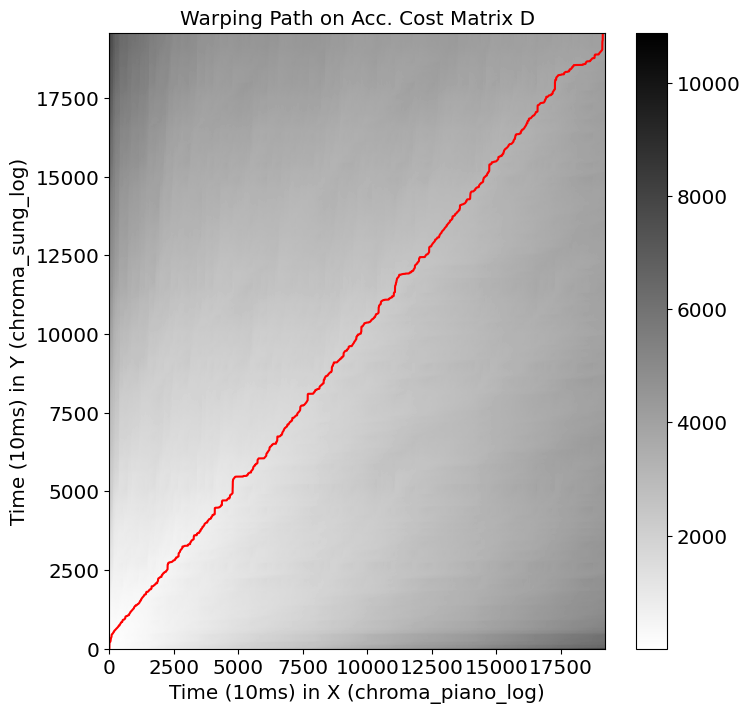

In [31]:
import librosa.display
D, wp = librosa.sequence.dtw(X=x_kf1_chroma, Y=x_kf2_chroma, metric='cosine')

plt.subplots(figsize=(8, 8))
plt.imshow(D, origin='lower', cmap='gray_r', aspect='auto')
plt.plot(wp[:, 1], wp[:, 0], color='r')
plt.title('Warping Path on Acc. Cost Matrix D')
plt.ylabel('Time (10ms) in Y (chroma_sung_log)')
plt.xlabel('Time (10ms) in X (chroma_piano_log)')
plt.colorbar()

plt.show()

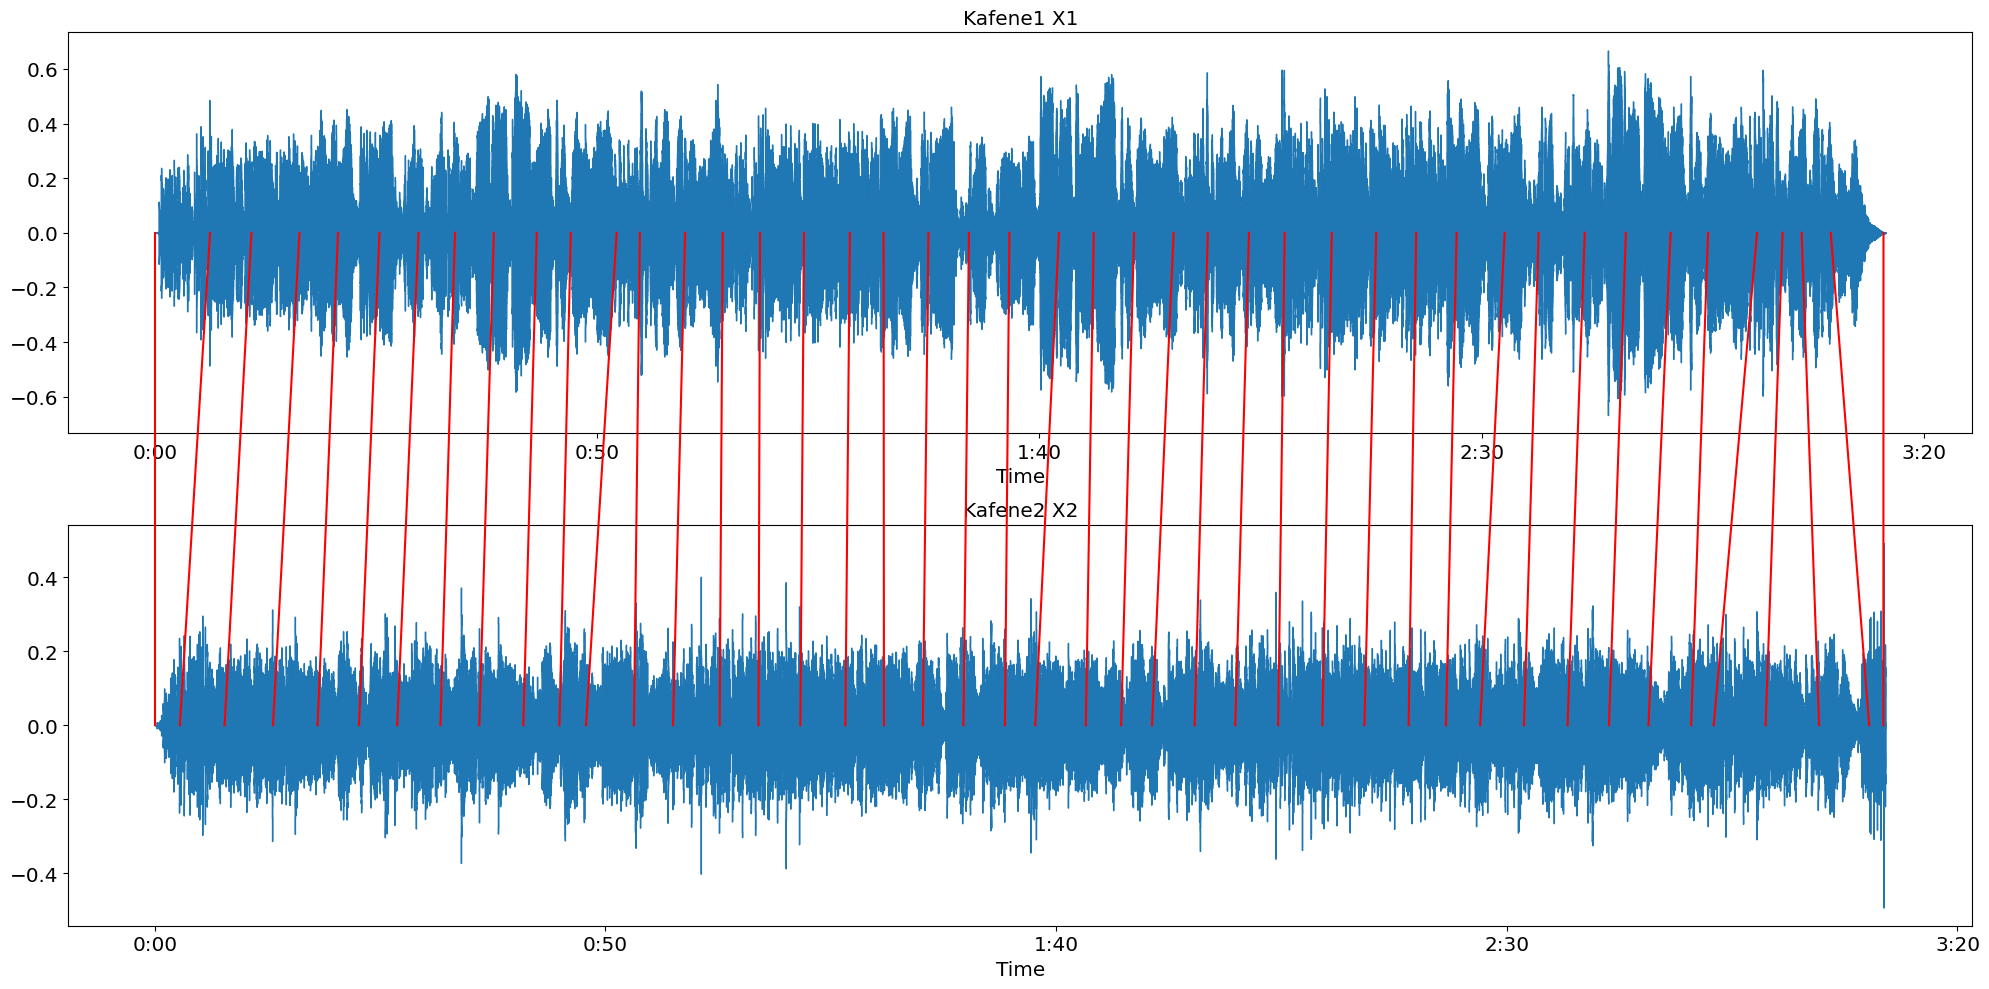

In [29]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(x_kf1, sr=fs_kf1)
plt.title('Kafene1 X1')
ax1 = plt.gca()
plt.subplot(2, 1, 2)
librosa.display.waveshow(x_kf2, sr=fs_kf2)
plt.title('Kafene2 X2')
ax2 = plt.gca()
plt.tight_layout()


n_line = 44
idx = np.int16(np.linspace(0, wp.shape[0] - 1, n_line))
line = []
for tp1, tp2 in wp[idx] * hop_size / 44100:
    p1 = fig.transFigure.inverted().transform(ax1.transData.transform([tp1, 0]))
    p2 = fig.transFigure.inverted().transform(ax2.transData.transform([tp2, 0]))
    line_temp = matplotlib.lines.Line2D((p1[0], p2[0]),(p1[1], p2[1]), transform=fig.transFigure, color='r')
    line.append(line_temp)

fig.lines = line
plt.tight_layout()

3. Find two files where the alignment does not work, and explain why. Note: this can be e.g. because the two versions differ in form (e.g. Refrain repeated in one version), tuning, or instrumentation. Also: the chroma features work best for harmonic instruments, and for western-tonal music.

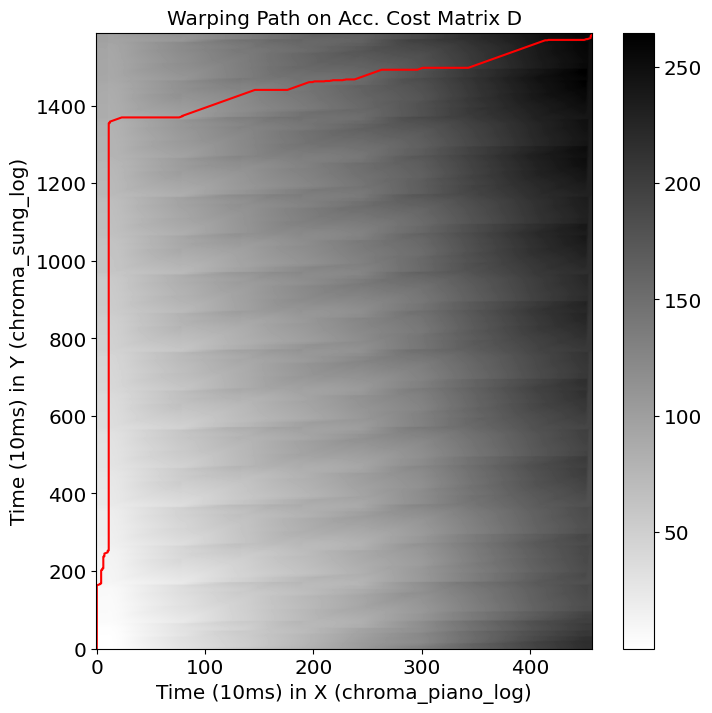

In [32]:
import librosa
import librosa.display

x_drum, fs_drum= librosa.load('drumloop120_mono.wav',sr=None)
window_drum = int(fs_drum * 0.001 * 100)
hop_drum = int(fs_drum * 0.001 * 10)
x_drum_chroma = librosa.feature.chroma_stft(y=x_drum, sr=fs_drum, tuning=0, norm=2,
                                         hop_length=hop_drum, n_fft=window_drum)

x_flute, fs_flute= librosa.load('flute-c-major.wav',sr=None)
window_flute = int(fs_flute * 0.001 * 100)
hop_flute = int(fs_flute * 0.001 * 10)
x_flute_chroma = librosa.feature.chroma_stft(y=x_flute, sr=fs_flute, tuning=0, norm=2,
                                         hop_length=hop_flute, n_fft=window_flute)

D, wp = librosa.sequence.dtw(X=x_drum_chroma, Y=x_flute_chroma, metric='cosine')

plt.subplots(figsize=(8, 8))
plt.imshow(D, origin='lower', cmap='gray_r', aspect='auto')
plt.plot(wp[:, 1], wp[:, 0], color='r')
plt.title('Warping Path on Acc. Cost Matrix D')
plt.ylabel('Time (10ms) in Y (chroma_sung_log)')
plt.xlabel('Time (10ms) in X (chroma_piano_log)')
plt.colorbar()

plt.show()

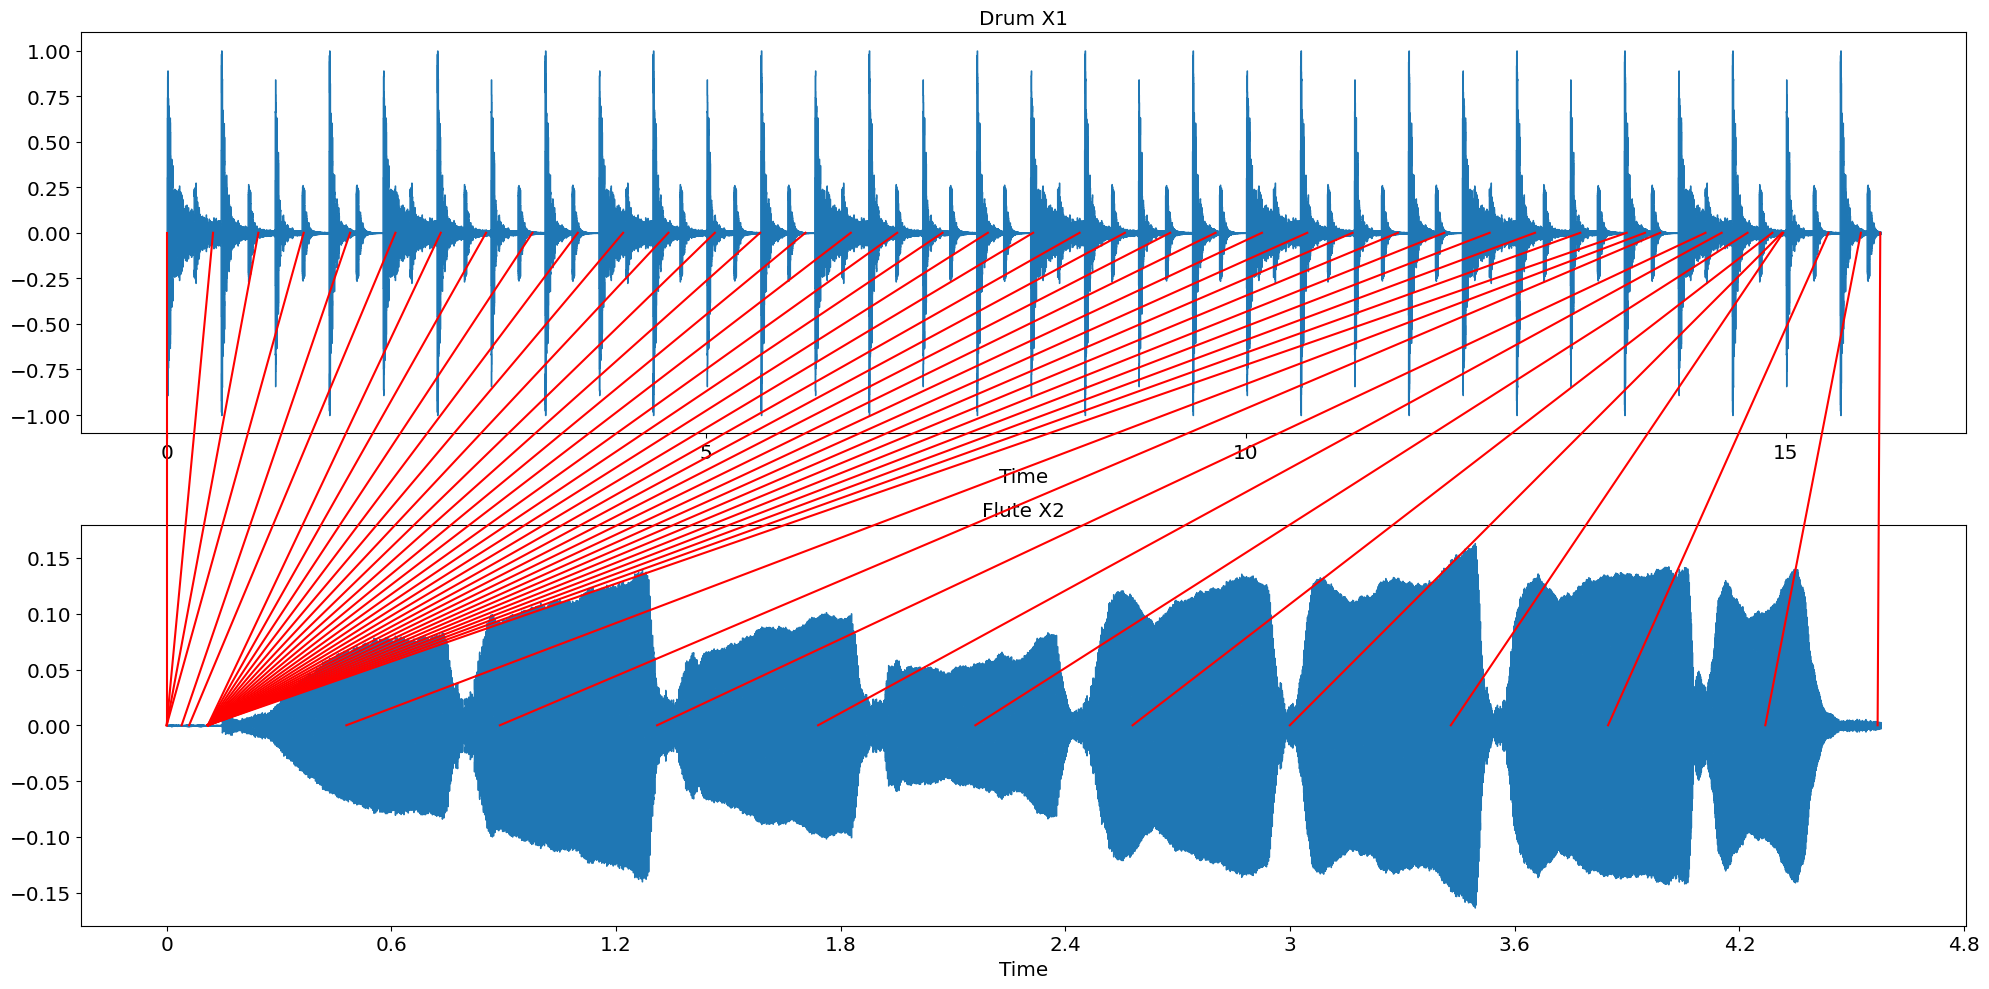

In [33]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.waveshow(x_drum, sr=fs_drum)
plt.title('Drum X1')
ax1 = plt.gca()
plt.subplot(2, 1, 2)
librosa.display.waveshow(x_flute, sr=fs_flute)
plt.title('Flute X2')
ax2 = plt.gca()
plt.tight_layout()


n_line = 44
idx = np.int16(np.linspace(0, wp.shape[0] - 1, n_line))
line = []
for tp1, tp2 in wp[idx] * hop_size / 44100:
    p1 = fig.transFigure.inverted().transform(ax1.transData.transform([tp1, 0]))
    p2 = fig.transFigure.inverted().transform(ax2.transData.transform([tp2, 0]))
    line_temp = matplotlib.lines.Line2D((p1[0], p2[0]),(p1[1], p2[1]), transform=fig.transFigure, color='r')
    line.append(line_temp)

fig.lines = line
plt.tight_layout()

The alignment of the two files does not work, since the two files are all from different instrumentations, and have different tunings and rhythms, where the algorithm cannot match the notes in one file to the other file.